# Project Goal
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

# Data Overview

Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

%matplotlib inline

# 2. Import Dataset

In [2]:
data_desc = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [3]:
data_desc.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
def data_description(col):
    print(data_desc.loc[col]['Description'])

In [6]:
data_description('installment')

The monthly payment owed by the borrower if the loan originates.


`Di sini saya membuat fungsi untuk mendapatkan deskripsi setiap kolom yang ada di dataset.`

### Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.shape

(396030, 27)

### Data Description

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
df.describe(include='O')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


# 3. Extploratory Data Analysis

## 3.1. Check Imbalanced Dataset

<AxesSubplot:xlabel='loan_status', ylabel='count'>

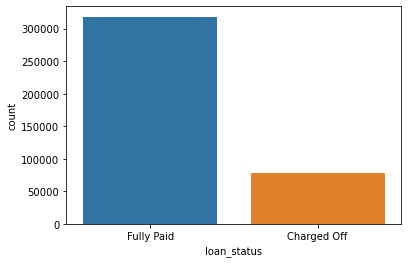

In [11]:
sns.countplot(x='loan_status', data=df)

### Percentage

In [12]:
(df.loan_status.value_counts(normalize=True))*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

`Bisa dilihat, ternyata hasilnya menjelaskan bahwa datasetnya itu tidak balanced karena orang yang membayar pinjaman lebih banyak dibandingkan dengan orang yang tidak membayar. Namun, sepertinya data imbalanced ini tidak terlalu parah. Untuk itu, pada project kali ini saya akan mencoba membuat 2 model untuk membandingkan ketika menggunakan 'class_weight' untuk mengatasi data imbalanced dan model yang tidak.`

## 3.2. histogram of the loan_amnt column.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

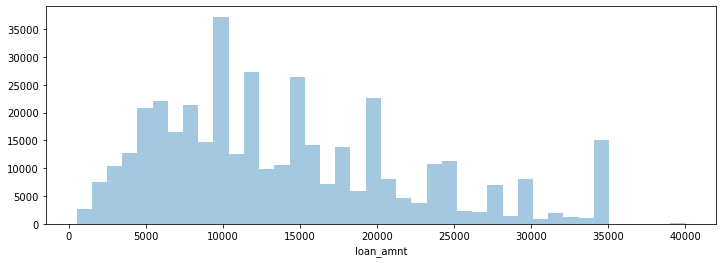

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

`Bisa dilihat, ternyata terjadi lonjakan jumlah pinjaman sekitar 10000.`

## 3.3. Correlation Between the Continuous Feature Variables

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


### 3.3.1 Heatmap

<AxesSubplot:>

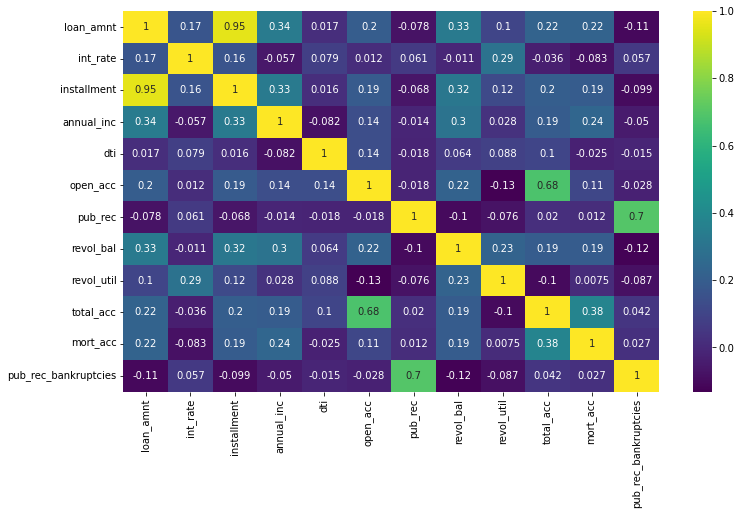

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

`Bisa dilihat ternyata kolom 'istallment' ini memiliki korelasi yang hampir sempurna terhadap kolom 'loan_amount'. Untuk itu, saya akan meninjau lebih jauh kedua kolom ini.`

In [16]:
data_description('installment')

The monthly payment owed by the borrower if the loan originates.


In [17]:
data_description('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


`Jadi berdasarkan deskripsi antara kolom 'loan_amnt' dan 'installment', ternyata kedua kolom tersebut saling berhubungan yang mana orang yang meminjam sejumlah uang (loan_amnt), maka besar cicilannya (installment) bergantung pada jumlah uang yang dipinjam. Hal ini sangat wajar jika keduanya memiliki korelasi yang sempurna.`

## 3.4. Plot the Correlation Between `installment` vs `loan_amnt`

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

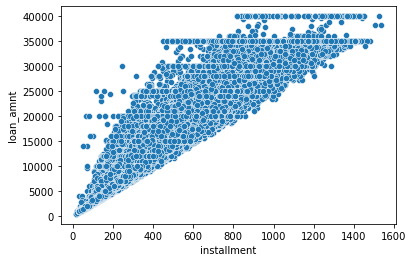

In [18]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

`Bisa dilihat dari hasilnya scatter plotnya itu, semakin banyak cicilan, maka itu berarti jumlah uang yang dipinjamnya semakin banyak.`

## 3.5. Create a Boxplot Showing the Relationship Between the loan_status And the Loan Amount

In [19]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

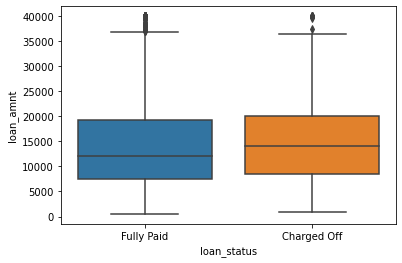

In [20]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


`Bisa dilihat, rata-rata jumlah uang yang tidak bisa dikembalikan itu sebesar 15126.300967 dan orang yang bisa mengembalikan uang itu sebesar 13866.878771.`

`Hal ini berarti berhubungan dengan outlier yang ada di dalam 'boxplot' sebelumnya yang mana nilai yang jauh dari nilai rata-rata merupakan nilai outlier itu sendiri.`

## 3.6. Explore the Grade and SubGrade Columns that LendingClub Attributes to the Loans

In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [23]:
data_description('grade')
data_description('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


In [24]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

`Bisa dilihat, ternyata kolom 'sub_grade' ini merupakan bagian dari kolom 'grade'`

### Grade vs loan_status

<AxesSubplot:xlabel='grade', ylabel='count'>

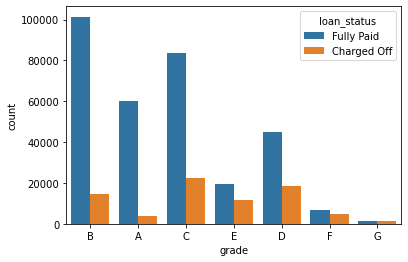

In [26]:
sns.countplot(x='grade',data=df,hue='loan_status')

`Bisa dilihat ternyata peminjam dengan grade B memiliki pengembalian uang paling tinggi dibandingkan dengan grade yang lainnya. Dilain sisi, grade G memiliki rasio pengembalian uang yang relatif sama dengan uang yang tidak dikembalikan.`

### Visualize count plot per subgrade.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

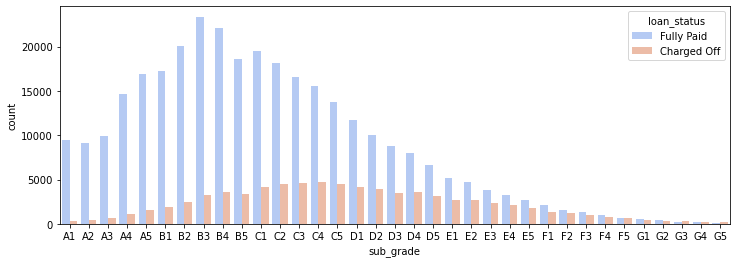

In [27]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

`Bisa dilihat, ternyata sub_grade 'F' dan 'G' ini juga memilki rasio pengembalian uang yang relatif sama dengan uang yang tidak dikembalikan seperti kolom 'grade'. Untuk itu, selanjutnya saya akan menelaah data 'F' dan 'G' lebih lanjut.`

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

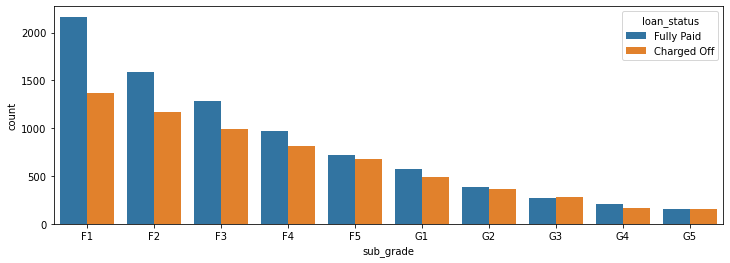

In [28]:
fg = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(fg['sub_grade'].unique())
sns.countplot(x='sub_grade', data=fg, order= subgrade_order, hue='loan_status')

`Ternyata, grade F1 memiliki nilai yang paling tinggi untuk pengembalian uang dibandingkan dengan yang lain. Namun, grade F1 juga memiliki jumlah uang yang tidak dikembalikan paling tinggi dibandingkan dengan grade yang lain.`

### Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [30]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

`Pada tahap ini saya akan membuat kolom baru yang bernama 'loan_repaid' yang menjelaskan orang itu sudah membayar pinjamannya atau belum. Nilai dari kolomnya berisi dari kolom loan_status yang nilainya diganti 0 atau 1.`

`Alasan diganti nilainya menjadi 0 atau 1 karena di sini saya mau melihat korelasi semua kolom terhadap targetnya, sehingga data yang dibutuhkan itu harus berupa numerik.`

In [31]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


### Showing the correlation of the numeric features to loan_repaid

<AxesSubplot:>

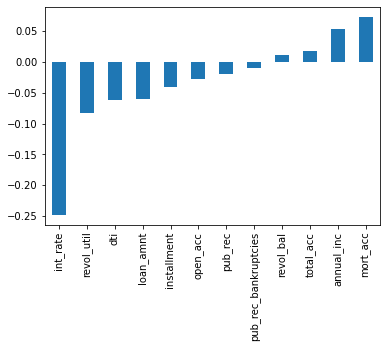

In [32]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

`Bisa dilihat hasilnya, tenyata orang yang memiliki interest rate yang tinggi untuk meminjam uang memiliki korelasi negatif yang tinggi terhadap apakah orang itu bisa melunasi pinjamannya atau tidak. Hal ini sangat masuk akal karena ketika banyak orang yang meminjam uang, maka akan banyak menemukan orang yang tidak dapat membayar.`

# 4. Data Pre-Processing

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## 4.1. Handling Missing Value

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

`Bisa dilihat, terdapat beberapa kolom yang memiliki missing value:`
> 1. emp_title
> 2. emp_length
> 3. title
> 4. revol_util
> 5. mort_acc 
> 6. pub_rec_bankruptcies 

### Percentage of Missing Value

In [35]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

`Persentase missing value:`
> 1. emp_title: 5.789208%
> 2. emp_length: 4.621115%
> 3. title: 0.443148%
> 4. revol_util: 0.069692%
> 5. mort_acc: 9.543469%
> 6. pub_rec_bankruptcies: 0.135091%

###  4.1.1. `emp_title` and `emp_length`

In [36]:
data_description('emp_title')
print('\n')
data_description('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


`Kolom 'empt_title' ini menjelaskan pekerjaan dari orang yang meminjam uang itu apa.`

`Kolom 'emp_length' ini menjelaskan sudah berapa lama orang itu bekerja.`

In [37]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

`Bisa dilihat, ada berbagai macam pekerjaan orang yang dari orang yang meminjam uang.`

`Dan juga bisa dilihat, jumlah dari jenis pekerjaannya itu sangat banyak yang mana ini akan sulit untuk diproses sebagai suatu data kategorikal. Karena terlalu banyak jumlah data yang menjelaskan pekerjaan orang yang meminjam uang, maka untuk pemrosesan selanjutnya saya memilih untuk menghapus kolomnya.`

`Hal ini dilakukan supaya model tidak sulit dalam mencari pola.`

In [38]:
df = df.drop('emp_title',axis=1)

### 4.1.2 `emp_length` Identification

In [39]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [40]:
len_order = ['< 1 year',
             '1 year',
             '2 years',
             '3 years',
             '4 years',
             '5 years',
             '6 years',
             '7 years',
             '8 years',
             '9 years',
             '10+ years']

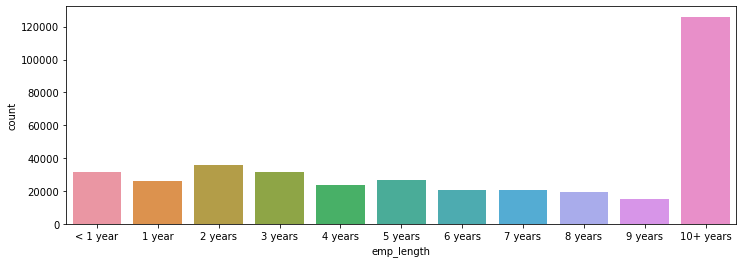

In [41]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',order=len_order, data=df);

`Bisa dilihat, ternyata orang yang meminjam uang itu paling banyak adalah orang yang sudah bekerja lebih dari 10 tahun.`

### Visualize `emp_length` based on `loan_status`

<AxesSubplot:xlabel='emp_length', ylabel='count'>

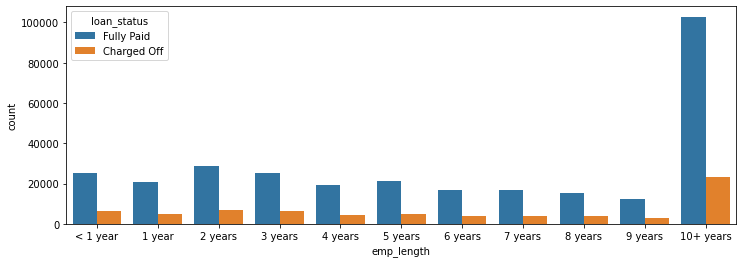

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=len_order, hue='loan_status')

`Berdasarkan hasil di atas, ternyata masih masuk akal kalau orang yang sudah bekerja di atas 10 tahun itu memiliki jumlah pinjaman yang paling tinggi.`

`Dan berdasarkan visualisasi di atas, orang yang bekerja di bawah 10 tahun itu memiliki rasio 'Fully Paid' dan 'Charge Off' yang hampir mirip satu sama lain. Hal ini berarti orang yang bekerja di bawah 10 tahun ini nilainya kurang informatif. Untuk itu, di sini saya mau menelaah lebih jauh lagi mengenai orang yang bisa/tidak bisa membayar uang pinjamannya berdasarkan lama bekerjanya.`

### Percentage of Fully Paid and Charged Off based on 'emp_length'

In [43]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

#### Jumlah orang yang tidak dapat membayar uang pinjaman berdasarkan lama dia bekerja

In [44]:
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

#### Jumlah orang yang dapat membayar uang pinjaman berdasarkan lama dia bekerja

In [45]:
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [46]:
#RASIO

emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

`Ini merupakan rasio/perbandingan antara orang yang tidak bisa membayar (Charged Off) dengan orang yang bisa membayar (Fully Paid)`

### Charge Off Percentage

In [47]:
(emp_co/(emp_co+emp_fp))*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

`Bisa dilihat juga persentase orang yang tidak bisa membayar (Charge Off) ini memiliki persentase yang mirip satu sama lain untuk terhadap seberapa lama dia bekerja. Hal ini mungkin lama orang bekerja tidak memiliki pengaruh yang signifikan untuk menentukan apakah orang itu bisa membayar uang pinjamannya atau tidak.`

### Fully Paid Percentage

In [48]:
(emp_fp/(emp_co+emp_fp))*100

emp_length
1 year       80.086547
10+ years    81.581390
2 years      80.673794
3 years      80.476867
4 years      80.761523
5 years      80.781279
6 years      81.080562
7 years      80.522600
8 years      80.023998
9 years      79.952984
< 1 year     79.312845
Name: loan_status, dtype: float64

`Bisa dilihat juga, ternyata persentase orang yang bisa membayar (Fully Paid) uang pinjamannya berdasarkan lamanya dia bekerja itu juga mirip satu sama lain, sehingga memang benar kalau lama orang bekerja tidak memiliki pengaruh yang signifikan untuk menentukan apakah orang itu bisa membayar uang pinjamannya atau tidak. Untuk itu, selanjutnya saya akan menghapus kolom 'emp_lenght'`

In [49]:
df = df.drop('emp_length',axis=1)

### 4.1.3 Let's continue to explore the missing value

In [50]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### `title & purpose`

In [51]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [52]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

`Bisa dilihat, ternyata kolom 'title' dan kolom 'purpose' ini memiliki nilai yang mirip satu sama lain. Hal ini dapat menyebabkan Multicollinearity, sehingga saya akan memilih salah satu diantara kedua kolom tersebut dengan cara menghapus salah satu kolom diantara keduanya.`

`Dalam hal ini yang akan saya didrop/dihapus adalah kolom 'title' karena kolom 'title' itu hanya kolom deskripsi dari kolom 'purpose'`

In [53]:
df = df.drop('title',axis=1)

In [54]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

`Bisa dilihat, masih terdapat beberapa kolom yang memiliki missing value. Untuk itu, saya akan lanjut untuk menangani missing value tersebut.`

### `mort_acc`

In [55]:
data_description('mort_acc')

Number of mortgage accounts.


In [56]:
df.mort_acc.unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [57]:
(df.mort_acc.isnull().sum()/len(df))*100

9.543468929121532

`Kolom 'mortgage' ini merupakan jumlah barang yang dijadikan jaminan terhadap orang yang meminjam uang.`

`Bisa dilihat sebelumnya, ternyata kolom 'mort_acc' ini memiliki jumlah missing value yang sangat banyak yang mana hampir 10% nilai missing valuenya. Namun, persentase missing valuenya hanya 10%. Untuk itu, di sini saya akan menelaah lebih jauh korelasi kolom 'mort_acc' terhadap kolom yang lainnya untuk menentukan apakah kolom 'mort_acc' ini dihapus atau diisi dengan nilai yang lain.`

In [58]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Correlation of all columns with `mort_acc` 

In [59]:
print("Correlation of all columns with mort_acc")
df.corr()['mort_acc'].sort_values()

Correlation of all columns with mort_acc


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [60]:
data_description('total_acc')

The total number of credit lines currently in the borrower's credit file


`Bisa dilihat, korelasi tertinggi ada di kolom 'total_acc' yang menjelaskan jumlah kartu kredit yang digunakan untuk meminjam uang. Hal ini sangat masuk akal karena semakin banyak uang uang dipinjam, maka akan semakin besar juga jaminan yang diberikan.`

### Mean of `mort_acc` column `per total_acc`

In [61]:
df.total_acc.unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [62]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg.sort_values(ascending=False)

Mean of mort_acc column per total_acc


total_acc
115.0    8.0
104.0    8.0
92.0     5.0
89.0     4.6
97.0     4.5
        ... 
2.0      0.0
117.0    0.0
108.0    0.0
103.0    0.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

`Berdasarkan hasil di atas, ternyata orang yang memiliki jumlah kartu kredit sebanyak 115 dan 104 yang digunakan untuk meminjam uang memiliki jumlah barang jaminan yang paling banyak.` 

`Saya rasa kolom 'mort_acc' ini merupakan kolom yang penting karena menurut saya jumlah jaminan yang diberikan peminjam dapat digunakan untuk memprediksi apakah orang itu mengembalikan uang pinjamannya atau tidak. Untuk itu, meskipun kolom 'mort_acc' ini memiliki jumlah missing value (nilai yang hilang) paling banyak, saya tidak akan menghapusnya, melainkan memilih untuk mengisi nilainya berdasarkan rata-rata jaminan yang diberikan berdasarkan masing-masing jummlah kartu kredit yang dimiliki peminjam.`

### Fill in the missing value in `mort_acc` based on the average of `total_acc` 

In [63]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc    

In [64]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [65]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

`Nilai missing value dari 'mort_acc' sudah berhasil terisi dengan baik.`

`Dan juga bisa dilihat, masih terdapat missing value pada kolom 'revol_util' dan 'pub_rec_bankrupticies' yang mana kedua kolom ini jumlah missing valuenya hanya sedikit. Untuk itu, saya lebih memilih untuk menghapus barisnya saja.`

### Dropping `revol_util` and `pub_rec_bankrupticies`

In [66]:
df = df.dropna()

In [67]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

`Semua missing value sudah diatasi dengan baik.`

## 4.2 Categorical Variables and Dummy Variables

`Karena model Machine Learning hanya dapat mengolah data berupa angka, maka pada tahap ini saya akan mengolah data kategorikal/object yang ada di dalam dataset terlebih dahulu dengan mengubahnya menjadi data dummy sebelum dimasukkan ke dalam model Machine Learning.`

In [68]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [69]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### 4.2.1 `Term` Feature

In [70]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [71]:
data_description('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [72]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

`Kolom 'term' ini merupakan kolom yang menjelaskan jumlah pembayaran pinjaman yang terjadi. Isi dari kolom 'term' ini merupakan jumlah pembayaran dalam kurun waktu 36 atau 60 bulan.`

`Kolom 'term' itu merupakan data yang bertipe object/kategorik dan di dalamnya terdapat 2 nilai angka, yakni '36' dan '60'. Untuk itu, saya akan mengambil angkanya saja supaya jadi numerik.`

In [73]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

### 4.2.2. `grade` & `sub_grade` Feature

In [74]:
data_description('grade')
data_description('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


In [75]:
print(f'The value of grade: {df.grade.unique()}')
print(f'The value of sub_grade: {df.sub_grade.unique()}')

The value of grade: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
The value of sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


`Bisa dilihat, kolom 'sub_grade' itu merupakan bagian dari kolom 'grade' yang  mana maksudnya itu sama, cuman bedanya pada kolom 'sub_grade' ini tingkatannya lebih spesifik. Untuk itu, saya akan memilih kolom 'sub_grade' untuk disimpan dan menghapus/drop kolom 'grade'`

In [76]:
df = df.drop('grade',axis=1)

### Convert the `sub_grade` into dummy variables

`Karena kolom 'sub_grade' ini memiliki beberapa data kategorik, maka di sini saya akan mengubahnya menjadi suatu data dummy terlebih dahulu agar mesin dapat membaca datanya yang berupa angka.`

In [77]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
sub_grade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
df = pd.concat([df.drop('sub_grade',axis=1), sub_grade_dummies],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2.3. `verification_status, application_type, initial_list_status, purpose`

In [79]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies], axis=1)

### 4.2.4. `home_ownership`

In [80]:
data_description('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [81]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

`kolom 'home_ownership' ini menjelaskan mengenai status kepemilikan rumah. Jadi perusahaan ingin tau orang yang meminjam uang status kepemilikan rumahnya seperti apa:`

```
1. MORTGAGE ==> Mengangsur (KPR)
2. RENT ==> Sewa
3. OWN ==> Punya sendiri
4. OTHER ==> Yang lain
```

`Bisa dilihat, isi yang ada di kolom 'home_ownernship' ini ada 'NONE' dan 'ANY' yang jumlahnya sedikit dan maksudnya tidak jelas. Untuk itu, dalam hal ini saya ingin mengganti nilai dari 'NONE' dan 'ANY' menjadi 'OTHER'`

In [82]:
df['home_ownership']= df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

### Convert to dummy variables

In [83]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dummies], axis=1)

In [84]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


`Setelah nilai 'NONE' dan 'ANY' ini diganti dengan 'OTHER', maka selanjutnya kolom 'home_ownership' ini dijadikan angka dummy lagi seperti sebelumnya supaya model membaca datanya berupa angka.`

### 4.2.5. `address`

In [85]:
df.address

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

`Karena alamat rumah ini memiliki jumlah karkter yang sangat banyak yang akan menyebabkan kesulitan mesin mencari pola, maka pada tahap ini saya ingin membuat kolom baru yang bernama 'zip_code' yang hanya berisi code addressnya saja.`

In [86]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [87]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### 4.2.6. `issue_d`

In [88]:
data_description('issue_d')

The month which the loan was funded


In [89]:
df.issue_d.unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

`Jadi kolom 'issue_d' ini merupakan kolom yang menjelaskan tentang kapan uang itu dipinjamkan/diberikan oleh perusahaan LendingClub.`

In [90]:
df = df.drop('issue_d',axis=1)

`Karena pada problem kali ini saya ingin mencari tahu apakah orang itu dapat mengembalikan pinjamannya atau tidak, maka dalam hal ini saya memilih untuk menghapus kolom 'issue_d'. Hal ini karena saya rasa informasi kapan uang itu dipinjamkan tidak terlalu penting pengaruhnya terhadap apakah orang itu akan mengembalikan pinjamannya atau tidak.`

### 4.2.7. `earliest_cr_line`

In [91]:
data_description('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


`Kolom 'earliest_cr_line' ini menjelaskan laporan pertama kali saat meminjam uang.`

In [92]:
df.earliest_cr_line.unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

`Dalam hal ini saya hanya ingin mengambil tahunnya saja dan menyimpannya di dalam kolom baru`

In [93]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

### 4.3.8. `loan_status`

In [94]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [95]:
df.drop(columns='loan_status', inplace=True)

`Dalam hal ini saya menghapus kolom 'loan_status' karena sebelumnya saya sudah memiliki kolom 'loan_repaid' sebagai target yang berupa numerik.`

# 5. Dataset Splitting

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = df.drop(columns="loan_repaid")
y = df.loan_repaid

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316175, 78), (79044, 78), (316175,), (79044,))

# 6. Normalizing Data

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Creating the Model

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [101]:
model = Sequential()

# hidden layer 1
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 3
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## 7.1 Callbacks ==> EarlyStopping

In [102]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [103]:
early_stop = EarlyStopping(patience=25)

## 7.2. Model Checkpoint

In [104]:
checkpoint = ModelCheckpoint(filepath= 'D:\\1. Data Science\\2. JCOp (Bagus banget)\\7. Deep Learning Master\\2. Tensorflow (Udemy)\\TensorFlow_FILES\\ANNs',
                             monitor = 'accuracy', 
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max',
                             save_freq='epoch'
                         )

## 7.3. Training the Model

In [105]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=128,
          callbacks=[checkpoint, early_stop],
          validation_data=(X_test, y_test), 
          )

Epoch 1/100
2465/2471 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.8836
Epoch 1: accuracy improved from -inf to 0.88365, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2818 - accuracy: 0.8836 - val_loss: 0.2622 - val_accuracy: 0.8875
Epoch 2/100
2454/2471 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.8882
Epoch 2: accuracy improved from 0.88365 to 0.88824, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 6s 3ms/step - loss: 0.2633 - accuracy: 0.8882 - val_loss: 0.2613 - val_accuracy: 0.8875
Epoch 3/100
2458/2471 [============================>.] - ETA: 0s - loss: 0.2617 - accuracy: 0.8884
Epoch 3: accuracy improved from 0.88824 to 0.88840, saving model to D:\1. Data Scien

2471/2471 [==============================] - 8s 3ms/step - loss: 0.2552 - accuracy: 0.8896 - val_loss: 0.2605 - val_accuracy: 0.8877
Epoch 24/100
2466/2471 [============================>.] - ETA: 0s - loss: 0.2551 - accuracy: 0.8898
Epoch 24: accuracy improved from 0.88961 to 0.88984, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2551 - accuracy: 0.8898 - val_loss: 0.2602 - val_accuracy: 0.8876
Epoch 25/100
2454/2471 [============================>.] - ETA: 0s - loss: 0.2551 - accuracy: 0.8896
Epoch 25: accuracy did not improve from 0.88984
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2551 - accuracy: 0.8895 - val_loss: 0.2600 - val_accuracy: 0.8882
Epoch 26/100
2454/2471 [============================>.] - ETA: 0s - loss: 0.2547 - accuracy: 0.8896
Epoch 26: accuracy did not improve from 0.88984
2471/2471 [===============

## 7.4. Evaluating Model Performance

In [106]:
evaluation = pd.DataFrame(model.history.history)
evaluation

,loss,accuracy,val_loss,val_accuracy
0,0.281762,0.883647,0.262180,0.887493
1,0.263338,0.888239,0.261296,0.887480
2,0.261739,0.888404,0.261204,0.887392
3,0.260842,0.888223,0.261464,0.887480
4,0.260369,0.888442,0.261040,0.887405
5,0.259915,0.888381,0.260454,0.887518
6,0.259502,0.888467,0.260487,0.887379
7,0.259167,0.888536,0.259954,0.887468
8,0.258913,0.888745,0.260098,0.888100
9,0.258447,0.888650,0.260049,0.887582


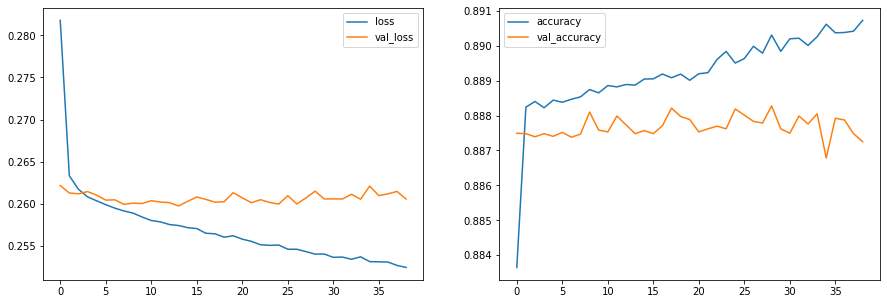

In [107]:
def eval_plot():
  metrics = evaluation
  fig, axes = plt.subplots(1,2, figsize=(15,5))
  metrics[['loss', 'val_loss']].plot(ax=axes[0])
  metrics[['accuracy', 'val_accuracy']].plot(ax=axes[1])

eval_plot()

`Ternyata, hasil dari model yang dibuat ini memiliki tingkat overfit yang lumayan. Hal ini ditandai dengan perbedaan nilai loss dan accuracy terhadap validationya yang lumayan signifikan. Namun, untuk evaluasi yang lebih pasti, kita bisa melihat perbandingan nilai dari score confussion matrixnya.`

## 7.5. Confusion Matrix

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [109]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

TEST
              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15505
           1       0.88      1.00      0.93     63539

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

Accuracy : 0.8872526693993219


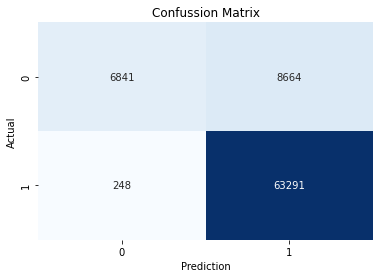

In [110]:
print('TEST')
print(classification_report(y_test, predictions))
print('Accuracy :', accuracy_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='.0f', cbar=False, cmap='Blues')
plt.title('Confussion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual');

`Hasil di atas menjelaskan bahwa:`
> 1. Sebanyak 6841 data berhasil diprediksi oleh mesin dengan benar dan sesuai dengan data aslinya yang mana 6841 orang tidak membayar kembali uang pinjamannya.
> 2. Sebanyak 63291 data berhasil diprediksi oleh mesin dengan benar dan sesuai dengan data aslinya yang mana 63291 orang dapat membayar kembali uang pinjamannya.
> 3. Sebanyak 248 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 248 orang yang tidak membayar kembali uang pinjamannya, padahal dia membayar.
> 4. Sebanyak 8664 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 8481 orang yang dapat membayar kembali uang pinjamannya, padahal dia tidak membayar kembali uang pinjamannya.

`Berdasarkan hasil confusion Matrix, maka di dapatkan akurasi sekitar 88.7%. Namun, proses ini dilakukan tanpa memperhatikan datanya imbalance. Untuk itu, selanjutnya saya akan membuat model dengan menggunakan 'class_weight' untuk nengatasi data imbalanced supaya mendapatkan 2 model Neural Network yang bisa dikomparasi.`

## 7.6. Make a Predictions

In [111]:
df_analysis = pd.DataFrame(X_test, columns=df.columns.drop('loan_repaid'))
df_analysis['Actual'] = y_test.to_numpy()
df_analysis['Prediction'] = predictions
df_analysis

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year,Actual,Prediction
0,0.746835,0.0,0.084534,0.604172,0.011830,0.001833,0.191011,0.0,0.034518,0.089880,0.167785,0.029412,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.811594,1,1
1,0.152532,0.0,0.303467,0.134490,0.019123,0.000015,0.089888,0.0,0.000061,0.000336,0.060403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913043,0,1
2,0.291139,0.0,0.100117,0.236768,0.005743,0.002276,0.089888,0.0,0.001103,0.024543,0.107383,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.840580,1,1
3,0.443038,0.0,0.027659,0.350365,0.020100,0.001222,0.123596,0.0,0.018153,0.038328,0.140940,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.681159,1,1
4,0.189873,0.0,0.411375,0.174412,0.005972,0.002871,0.213483,0.0,0.003217,0.070604,0.187919,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.927536,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79039,0.599367,1.0,0.542267,0.404703,0.006317,0.002568,0.112360,0.0,0.004381,0.056707,0.067114,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.898551,1,1
79040,0.620253,0.0,0.312817,0.547192,0.011026,0.003138,0.235955,0.0,0.012767,0.051216,0.208054,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.913043,0,0
79041,0.215190,0.0,0.523179,0.206025,0.005169,0.000877,0.056180,0.0,0.005329,0.097277,0.033557,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

____

____

# 8. Model Improvement

`Pada model improvement kali ini saya akan mencoba memasukkan parameter 'class_weight' untuk mengatasi imbalaced data dan menambah jumlah layer pada arsitektur.`

In [112]:
model = Sequential()

# hidden layer 1
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 3
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## 8.1. Callbacks ==> EarlyStopping

In [113]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [114]:
early_stop = EarlyStopping(patience=25)

## 8.2. Class_weight

In [115]:
from sklearn.utils.class_weight import compute_class_weight

In [116]:
compute_class_weight(class_weight='balanced', classes=df.loan_repaid.unique(), y= pd.Series(df.loan_repaid))

array([0.62200815, 2.54904351])

In [117]:
class_weight = {0: 0.62200815, 1: 2.54904351}

## 8.3. Model Check Point

In [118]:
checkpoint = ModelCheckpoint(filepath= 'D:\\1. Data Science\\2. JCOp (Bagus banget)\\7. Deep Learning Master\\2. Tensorflow (Udemy)\\TensorFlow_FILES\\ANNs',
                             monitor = 'accuracy', 
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max',
                             save_freq='epoch'
                         )

## 8.4. Training the Model

In [119]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=128,
          callbacks=[checkpoint, early_stop],
          class_weight= class_weight,
          validation_data=(X_test, y_test)
         )

Epoch 1/100
2465/2471 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8821
Epoch 1: accuracy improved from -inf to 0.88205, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2809 - accuracy: 0.8821 - val_loss: 0.3223 - val_accuracy: 0.8875
Epoch 2/100
2460/2471 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.8883
Epoch 2: accuracy improved from 0.88205 to 0.88825, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2567 - accuracy: 0.8883 - val_loss: 0.3152 - val_accuracy: 0.8875
Epoch 3/100
2462/2471 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.8882
Epoch 3: accuracy did not improve from 0.88825
2471/2471 [==========================

Epoch 26/100
2461/2471 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8885
Epoch 26: accuracy improved from 0.88848 to 0.88850, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2473 - accuracy: 0.8885 - val_loss: 0.3119 - val_accuracy: 0.8874
Epoch 27/100
2467/2471 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.8885
Epoch 27: accuracy did not improve from 0.88850
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2471 - accuracy: 0.8885 - val_loss: 0.3304 - val_accuracy: 0.8875
Epoch 28/100
2465/2471 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.8886
Epoch 28: accuracy improved from 0.88850 to 0.88852, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [=================

2471/2471 [==============================] - 7s 3ms/step - loss: 0.2440 - accuracy: 0.8890 - val_loss: 0.3345 - val_accuracy: 0.8875
Epoch 50/100
2468/2471 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.8891
Epoch 50: accuracy improved from 0.88899 to 0.88906, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2442 - accuracy: 0.8891 - val_loss: 0.3259 - val_accuracy: 0.8875
Epoch 51/100
2467/2471 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.8890
Epoch 51: accuracy improved from 0.88906 to 0.88908, saving model to D:\1. Data Science\2. JCOp (Bagus banget)\7. Deep Learning Master\2. Tensorflow (Udemy)\TensorFlow_FILES\ANNs
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2440 - accuracy: 0.8891 - val_loss: 0.3310 - val_accuracy: 0.8874


In [121]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

TEST
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15505
           1       0.88      1.00      0.93     63539

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

Accuracy : 0.8874171347603866


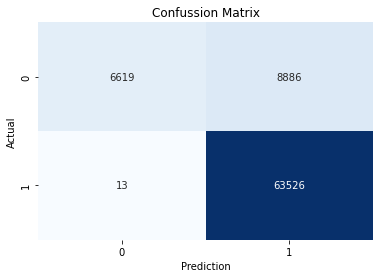

In [122]:
print('TEST')
print(classification_report(y_test, predictions))
print('Accuracy :', accuracy_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='.0f', cbar=False, cmap='Blues')
plt.title('Confussion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual');

`Hasil di atas menjelaskan dari 396030 data peminjam yang ada, bahwa:`
> 1. Sebanyak 6619 data berhasil diprediksi oleh mesin dengan benar dan sesuai dengan data aslinya yang mana 6619 orang tidak membayar kembali uang pinjamannya.
> 2. Sebanyak 63526 data berhasil diprediksi oleh mesin dengan benar dan sesuai dengan data aslinya yang mana 63517 orang dapat membayar kembali uang pinjamannya.
> 3. Sebanyak 13 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 22 orang yang tidak membayar kembali uang pinjamannya, padahal dia membayar.
> 4. Sebanyak 8886 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 8886 orang yang dapat membayar kembali uang pinjamannya, padahal dia tidak membayar kembali uang pinjamannya.

`Ternyata, ketika mencoba improvement model dengan memberikan class_weight untuk data imbalanced, hasil score 'accuracynya' tidak memiliki perubahan, malah sedikit mengalami penurunan.`

# Conclution

Project kali ini bertujuan untuk memprediksi apakah orang yang meminjam uang di perusahan LendingClub California dapat membayar uang pinjamannya atau tidak berdasarkan profil dari masing-masing orang seperti lama dia bekerja, jabatan kerja, jumlah uang yang dipinjam, dsb. Dataset ini terdiri dari 396030 dengan 27 kolom.

**Berdasarkan hasil model yang dibuat, maka dapat disimpulkan sebagai berikut:** <br>
1. Meskipun data cenderung `Imbalanced,` ternyata menggunakan `'class_weight'` tidak memiliki pengaruh yang signifikan dalam akurasi modelnya, yakni sekitar 88.7%. Hal ini berarti dataset yang dimiliki LendingClub California tidak begitu signifikan `Imbalanced.`


2. Sebenarnya untuk pemilihan model tergantung perusahaan itu sendiri ingin memiliki model yang dapat memprediksi seperti apa. Namun, dalam kasus ini menurut saya `'precision'` merupakan metrics pengukuran yang tepat untuk mengevaluasi model. Hal ini karena fokus utama dari `'precision'` adalah menginginkan nilai dari 'false positive' yang rendah.
> `False positive` sendiri merupakan kondisi ketika prediksi dari model adalah orang itu dapat membayar uang pinjamannya, tapi kenyataannya tidak. Hal ini berarti ketika nilai `Precision` tinggi, maka model akan memiliki nilai `False positive` yang rendah sehingga perusahaan LendingClub akan lebih baik dalam menentukan peminjaman uang terhadap apakah orang yang meminjam uang dapat mengembalikannya atau tidak.


3. Berdasarkan 2 model yang diuji **tanpa** `class_wegiht` dan **dengan** `class_weight` di dapatkan hasil `precision` sebagai berikut:
> **Tanpa** `class_weight:`
>> Dari 396030 data yang ada, sebanyak 8664 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 8481 orang yang dapat membayar kembali uang pinjamannya, padahal dia tidak membayar kembali uang pinjamannya.

 > **Dengan** `class_weight:`
>> - Dari 396030 data yang ada, Sebanyak 8886 data gagal diprediksi oleh mesin dengan benar terhadap data aslinya yang mana mesin memprediksi bahwa ada 8886 orang yang dapat membayar kembali uang pinjamannya, padahal dia tidak membayar kembali uang pinjamannya.

Hal ini berarti model lebih baik digunakan tanpa menggunakan `class_weight.`

## Recommendations for the next future

Berdasarkan hasil di atas, maka ada beberapa hal yang mungkin bisa dikembangkan pada model untuk kedepannya:
1. Menambahkan data terhadap orang yang tidak dapat membayar uang pinjaman
2. Mencoba untuk menggunakan teknik dari Machine Learning, terutama pada tree based model (Decision Tree, Random Forest, XGBoost, dan LGBM)
3. Mencoba mambahkan Batch Normalisasi untuk membuat data menjadi normal di setiap layernya
4. Mencoba melakukan pemilihan fitur dengan teknik `Mean Score Decrease`
5. Tuning parameter di dalam aristektur Neural Networknya, seperti menambah layer, memilih dropout yang sesuai, memodifikasi jumlah neurons setiap layer.